In [1]:
import mpi4py as mpi
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import geopandas as gpd # For reading in shapefiles
import numpy as np
import sys # For displaying package versions
import os # For managing directories and file paths if drive is mounted

from pyincore import IncoreClient, Dataset, FragilityService, MappingSet, DataService, FragilityCurveSet
from pyincore.analyses.buildingdamage.buildingdamage import BuildingDamage

from pyincore_viz.geoutil import GeoUtil as viz
from pyincore_viz.plotutil import PlotUtil as plot

In [2]:
from pyincore import FragilityService, IncoreClient
from pyincore import Mapping, MappingSet, FragilityCurveSet

In [3]:
# IN-CORE client
client = IncoreClient()

# Initiate fragility service
fragility_services = FragilityService(client)

Enter username:  mharati1987
Enter password:  ········


Connection successful to IN-CORE services. pyIncore version detected: 1.12.0


In [4]:
# Create a fragility curve set with three limit state for building RC1:

fragility_curve_LS_0 = {
    "description": "Moderate",
    "rules": [
        {
            "condition": [
                        "SA  >= 0",               #%%%%%%%%%%%%%%%%   easy one here
                        "Mmax >= 0"
            ],
                    "expression": "numpy.round(1.01 * (SA / 1.497100 + Mmax / 503.833000 + -5.274000e-01 * (SA / 1.497100) * (Mmax / 503.833000))**7.733400 / ((SA / 1.497100 + Mmax / 503.833000 + -5.274000e-01 * (SA / 1.497100) * (Mmax / 503.833000))**7.733400 + 1), decimals=2)"
        }
    ],
    "returnType": {
        "type": "Limit State",
        "unit": "",
        "description": "LS_0"
    }
}

fragility_curve_LS_1 = {
    "description": "Extensive",
    "rules": [
        {
            "condition": [
                        "SA  >= 0",           #%%%%%%%%%%%%%%%%   easy one here
                        "Mmax >= 0"
            ],
                    "expression": "numpy.round(1.01 * (SA / 1.924400 + Mmax / 674.352000 + -3.824000e-01 * (SA / 1.924400) * (Mmax / 674.352000))**6.062100 / ((SA / 1.924400 + Mmax / 674.352000 + -3.824000e-01 * (SA / 1.924400) * (Mmax / 674.352000))**6.062100 + 1), decimals=2)"
        }
    ],
    "returnType": {
        "type": "Limit State",
        "unit": "",
        "description": "LS_1"
    }
}

fragility_curve_LS_2 = {
    "description": "Complete",
    "rules": [
        {
            "condition": [
                        "SA  >= 0",    #%%%%%%%%%%%%%%%%   easy one here
                        "Mmax >= 0"
            ],
                    "expression": "numpy.round(1.01 * (SA / 2.355000 + Mmax / 969.377700 + -5.930000e-01 * (SA / 2.355000) * (Mmax / 969.377700))**7.047100 / ((SA / 2.355000 + Mmax / 969.377700 + -5.930000e-01 * (SA / 2.355000) * (Mmax / 969.377700))**7.047100 + 1), decimals=2)"
        }
    ],
    "returnType": {
        "type": "Limit State",
        "unit": "",
        "description": "LS_2"
    }
}



In [5]:
# place three curves into a set with extra metadata to define the metadata of RC1:

metadata = {
    "description": "RET-RC1 in Seaside Testbed (long-duration earthquakes)",    #%%%%%%%%%%%%%%%%
    "authors": [
        "Harati & van de Lindt (2024c)"   #%%%%%%%%%%%%%%%%
    ],
    "demandTypes": ["0.35 sec SA", "Mmax"], #       %%%%%%%%%%%%%%%%   text based 
    "demandUnits": ["g", "m^3/s^2"],
    "resultType":"Limit State",
    "hazardType": "earthquake+tsunami",  
    "inventoryType":"building",
    "fragilityCurves":[
        fragility_curve_LS_0,
        fragility_curve_LS_1,
        fragility_curve_LS_2,
    ],
    "curveParameters": [
        {
            "name": "SA", #this is what you recommended in your email           #%%%%%%%%%%%%%%%% easy one here
            "unit": "g",
            "description": "SA value from hazard service",              #%%%%%%%%%%%%%%%%  easy one here
            "fullName": "0.35 sec SA",                              #%%%%%%%%%%%%%%%%   text based
        },
        {
            "name": "Mmax", # I thought you stored "Mmax" as well in the coe space as your other option for the Momentum Flux!
            "unit": "m^3/s^2",   #but my favorit type of unit for this item is "m^3/s^2", can we do anything to have this one?
            "description": "momentumFlux value from hazard service",
            "fullName": "Mmax",
        }
    ]
}

In [6]:
# construct the fragility curve object to use

fragility_curve_set2 = FragilityCurveSet(metadata)
fragility_curve_set2

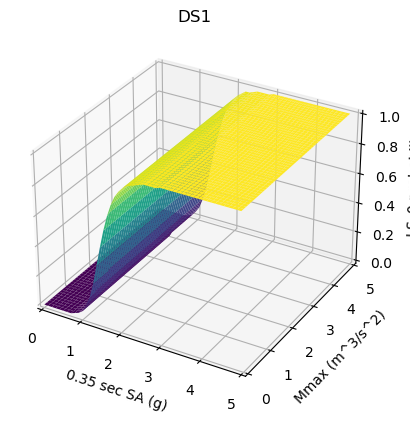

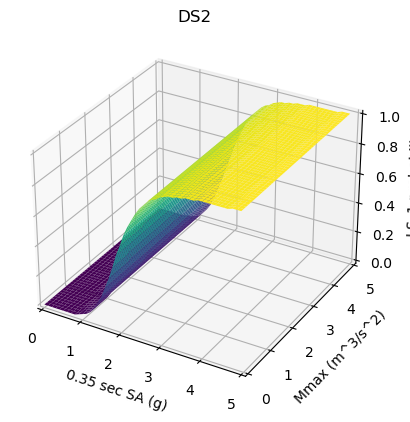

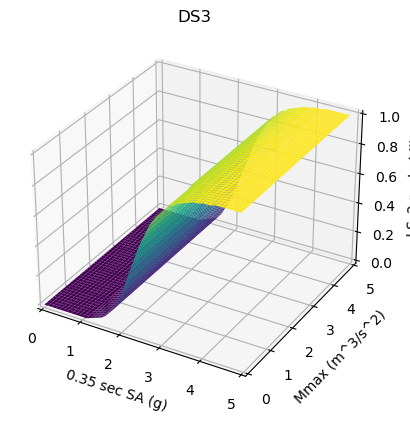

In [7]:
# use utility method of pyicore-viz package to visulaize the fragility
#fragility_set = FragilityCurveSet(FragilityService(client).get_dfr3_set(fragility_set_json_str))

fig = plot.get_fragility_plot_3d(fragility_curve_set2, 
                                            title="DS1",
                                            limit_state="LS_0", start=0, end=5, sample_interval=0.1)

ax = fig.gca()

# Set x, y, and z limits
x_limits = [0, 5]
y_limits = [0, 5]
z_limits = [0, 1]

ax.set_xlim3d(x_limits)
ax.set_ylim3d(y_limits)
ax.set_zlim3d(z_limits)

fig.show()

# use utility method of pyicore-viz package to visulaize the fragility
#fragility_set = FragilityCurveSet(FragilityService(client).get_dfr3_set(fragility_set_json_str))

fig = plot.get_fragility_plot_3d(fragility_curve_set2, 
                                            title="DS2",
                                            limit_state="LS_1", start=0, end=5, sample_interval=0.1)

ax = fig.gca()

# Set x, y, and z limits
x_limits = [0, 5]
y_limits = [0, 5]
z_limits = [0, 1]

ax.set_xlim3d(x_limits)
ax.set_ylim3d(y_limits)
ax.set_zlim3d(z_limits)

fig.show()

# use utility method of pyicore-viz package to visulaize the fragility
#fragility_set = FragilityCurveSet(FragilityService(client).get_dfr3_set(fragility_set_json_str))

fig = plot.get_fragility_plot_3d(fragility_curve_set2, 
                                            title="DS3",
                                            limit_state="LS_2", start=0, end=5, sample_interval=0.1)

ax = fig.gca()

# Set x, y, and z limits
x_limits = [0, 5]
y_limits = [0, 5]
z_limits = [0, 1]

ax.set_xlim3d(x_limits)
ax.set_ylim3d(y_limits)
ax.set_zlim3d(z_limits)

fig.show()

In [9]:
#The creation of fragility sets and curves used by the pyIncore library in hazard analyses?

created_fragility = fragility_services.create_dfr3_set(metadata)
created_fragility

{'id': '67ae5c11aa740d30874c5c23',
 'description': 'RET-RC1 in Seaside Testbed (long-duration earthquakes)',
 'authors': ['Harati & van de Lindt (2024c)'],
 'paperReference': None,
 'resultUnit': None,
 'resultType': 'Limit State',
 'hazardType': 'earthquake+tsunami',
 'inventoryType': 'building',
 'creator': 'mharati1987',
 'owner': 'mharati1987',
 'curveParameters': [{'name': 'SA',
   'unit': 'g',
   'description': 'SA value from hazard service',
   'fullName': '0.35 sec SA',
   'expression': None},
  {'name': 'Mmax',
   'unit': 'm^3/s^2',
   'description': 'momentumFlux value from hazard service',
   'fullName': 'Mmax',
   'expression': None}],
 'spaces': ['mharati1987'],
 'demandTypes': ['0.35 sec SA', 'Mmax'],
 'demandUnits': ['g', 'm^3/s^2'],
 'fragilityCurves': [{'description': 'Moderate',
   'rules': [{'condition': ['SA  >= 0', 'Mmax >= 0'],
     'expression': 'numpy.round(1.01 * (SA / 1.497100 + Mmax / 503.833000 + -5.274000e-01 * (SA / 1.497100) * (Mmax / 503.833000))**7.7334

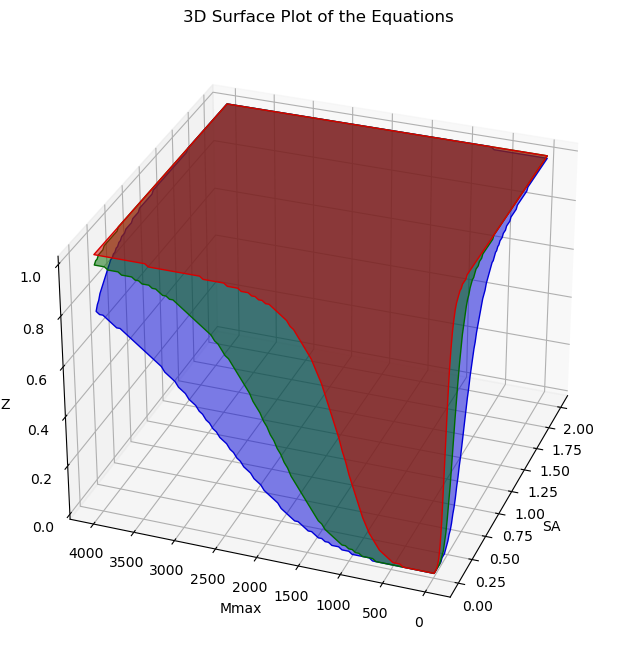

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



num_elements=100
# Define the ranges for x and y with an equal number of elements
sa_range = np.linspace(0.001, 2, num_elements)
mmax_range = np.linspace(0.001, 4000, num_elements)

# Create a meshgrid for the 3D plot
SA, Mmax = np.meshgrid(sa_range, mmax_range)

# Define the three equations
def equation1(SA, Mmax):
    return np.round(1.01 * (SA / 0.167900 + Mmax / 1174.000000 + 2.337000e-14 * (SA / 0.167900) * (Mmax / 1174.000000))**4.997000 / ((SA / 0.167900 + Mmax / 1174.000000 + 2.337000e-14 * (SA / 0.167900) * (Mmax / 1174.000000))**4.997000 + 1), decimals=2)







def equation2(SA, Mmax):
    return np.round(1.01 * (SA / 0.325400 + Mmax / 2063.000000 + 2.248000e-14 * (SA / 0.325400) * (Mmax / 2063.000000))**4.905000 / ((SA / 0.325400 + Mmax / 2063.000000 + 2.248000e-14 * (SA / 0.325400) * (Mmax / 2063.000000))**4.905000 + 1), decimals=2)







def equation3(SA, Mmax):
    return np.round(1.01 * (SA / 0.545600 + Mmax / 2889.000000 + 2.227000e-14 * (SA / 0.545600) * (Mmax / 2889.000000))**3.896000 / ((SA / 0.545600 + Mmax / 2889.000000 + 2.227000e-14 * (SA / 0.545600) * (Mmax / 2889.000000))**3.896000 + 1), decimals=2)









# Calculate the Z values based on the equations
Z1 = equation1(SA, Mmax)
Z2 = equation2(SA, Mmax)
Z3 = equation3(SA, Mmax)

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surfaces with specified colors
ax.plot_surface(SA, Mmax, Z1, facecolors='r', rstride=100, cstride=100, alpha=0.5)
ax.plot_surface(SA, Mmax, Z2, facecolors='g', rstride=100, cstride=100, alpha=0.5)
ax.plot_surface(SA, Mmax, Z3, facecolors='b', rstride=100, cstride=100, alpha=0.5)


# Labels and Title
ax.set_xlabel('SA')
ax.set_ylabel('Mmax')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot of the Equations')

# Change the angle of perspective
ax.view_init(elev=30, azim=200)  # Adjust these values as needed

plt.show()



In [11]:
metadata = {
    "description": "RET-W23 in Seaside Testbed (Earthquake-only 2D fragility for long-duration EQs)",
    "authors": [
        "Harati & van de Lindt (2024C)"
    ],
    "paperReference": None,
    "resultUnit": None,
    "resultType": "Limit State",
    "hazardType": "earthquake",
    "inventoryType": "building",
    "creator": "mharati1987",
    "owner": "mharati1987",
    "curveParameters": [
        {
            "name": "zero_point_seven_five_sa",
            "unit": "g",
            "description": "zero_point_seven_five_sa value from hazard service",
            "fullName": "0.75 sec SA",
            "expression": None
        }
    ],
    "spaces": [
        "mharati1987"
    ],
    "demandTypes": [
        "0.75 sec SA"
    ],
    "demandUnits": [
        "g"
    ],
    "fragilityCurves": [
        {
            "description": "legacy - StandardFragilityCurve - Immediate Occupancy",
            "rules": [
                {
                    "condition": [
                        "zero_point_seven_five_sa > 0"
                    ],
                    "expression": "numpy.round(1.01 * (zero_point_seven_five_sa / 1.876000 + 0.0001 / 335.800000 + 2.249000e-14 * (zero_point_seven_five_sa / 1.876000) * (0.0001 / 335.800000))**6.527000 / ((zero_point_seven_five_sa / 1.876000 + 0.0001 / 335.800000 + 2.249000e-14 * (zero_point_seven_five_sa / 1.876000) * (0.0001 / 335.800000))**6.527000 + 1), decimals=2)"
                }
            ],
            "returnType": {
                "type": "Limit State",
                "unit": "",
                "description": "LS_0"
            },
            "curveParameters": None
        },
        {
            "description": "legacy - StandardFragilityCurve - Life Safety",
            "rules": [
                {
                    "condition": [
                        "zero_point_seven_five_sa > 0"
                    ],
                    "expression": "numpy.round(1.01 * (zero_point_seven_five_sa / 2.439000 + 0.0001 / 469.300000 + 2.337000e-14 * (zero_point_seven_five_sa / 2.439000) * (0.0001 / 469.300000))**5.943000 / ((zero_point_seven_five_sa / 2.439000 + 0.0001 / 469.300000 + 2.337000e-14 * (zero_point_seven_five_sa / 2.439000) * (0.0001 / 469.300000))**5.943000 + 1), decimals=2)"
                }
            ],
            "returnType": {
                "type": "Limit State",
                "unit": "",
                "description": "LS_1"
            },
            "curveParameters": None
        },
        {
            "description": "legacy - StandardFragilityCurve - Collapse Prevention",
            "rules": [
                {
                    "condition": [
                        "zero_point_seven_five_sa > 0"
                    ],
                    "expression": "numpy.round(1.01 * (zero_point_seven_five_sa / 2.784000 + 0.0001 / 565.200000 + 2.292000e-14 * (zero_point_seven_five_sa / 2.784000) * (0.0001 / 565.200000))**5.091000 / ((zero_point_seven_five_sa / 2.784000 + 0.0001 / 565.200000 + 2.292000e-14 * (zero_point_seven_five_sa / 2.784000) * (0.0001 / 565.200000))**5.091000 + 1), decimals=2)"
                }
            ],
            "returnType": {
                "type": "Limit State",
                "unit": "",
                "description": "LS_2"
            },
            "curveParameters": None
        }
    ]
}

In [12]:
#The creation of fragility sets and curves used by the pyIncore library in hazard analyses?

created_fragility = fragility_services.create_dfr3_set(metadata)
created_fragility

{'id': '67ae5c510408f466292c4457',
 'description': 'RET-W23 in Seaside Testbed (Earthquake-only 2D fragility for long-duration EQs)',
 'authors': ['Harati & van de Lindt (2024C)'],
 'paperReference': None,
 'resultUnit': None,
 'resultType': 'Limit State',
 'hazardType': 'earthquake',
 'inventoryType': 'building',
 'creator': 'mharati1987',
 'owner': 'mharati1987',
 'curveParameters': [{'name': 'zero_point_seven_five_sa',
   'unit': 'g',
   'description': 'zero_point_seven_five_sa value from hazard service',
   'fullName': '0.75 sec SA',
   'expression': None}],
 'spaces': ['mharati1987'],
 'demandTypes': ['0.75 sec SA'],
 'demandUnits': ['g'],
 'fragilityCurves': [{'description': 'legacy - StandardFragilityCurve - Immediate Occupancy',
   'rules': [{'condition': ['zero_point_seven_five_sa > 0'],
     'expression': 'numpy.round(1.01 * (zero_point_seven_five_sa / 1.876000 + 0.0001 / 335.800000 + 2.249000e-14 * (zero_point_seven_five_sa / 1.876000) * (0.0001 / 335.800000))**6.527000 / ((

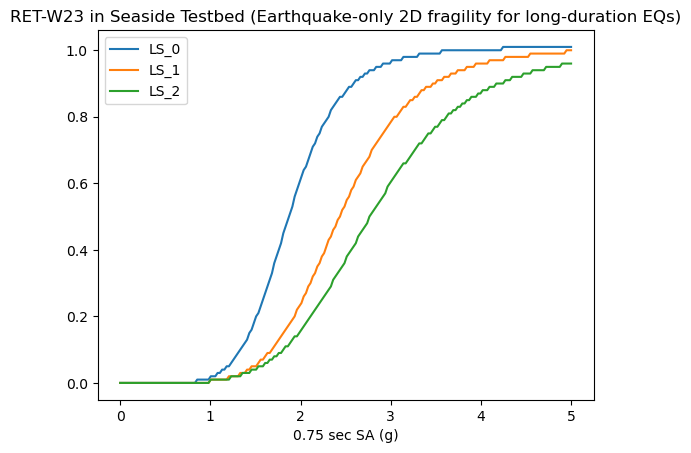

In [13]:
# construct the fragility curve object to use
fragility_curve_set2 = FragilityCurveSet(metadata)
fragility_curve_set2
from pyincore_viz.plotutil import PlotUtil as plot
plt = plot.get_fragility_plot(fragility_curve_set2, start=0, end=5)